In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import h5py


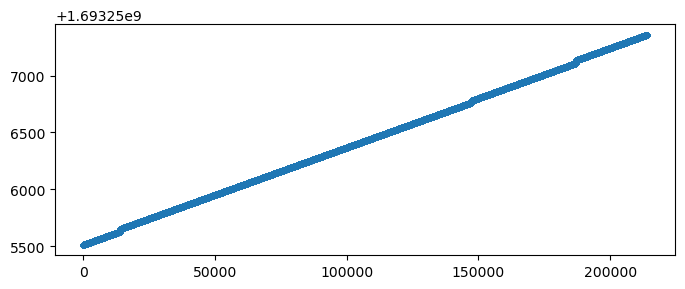

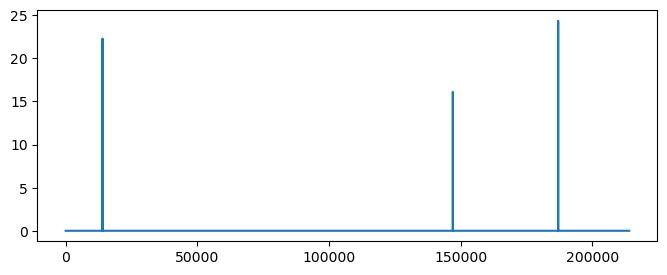

In [3]:
# Load preprocessed file

f = h5py.File('C:\AIND\output_data\BigTiffs2023-08-28T13_45_08.4768768-07_00\hsfp_data_preprocessed.hdf5','r')
time_405 = np.array(f['Time_405'])
time_445 = np.array(f['Time_445'])
time_473 = np.array(f['Time_473'])
time_514 = np.array(f['Time_514'])
time_560 = np.array(f['Time_560'])
timestamps = np.array(f['Full_TimeStamps'])
lasers = np.array(f['Lasers'])
wavelength = np.array(f['Wavelength'])
L_405_F1 = np.array(f['Channel_405_F1'])
L_405_F2 = np.array(f['Channel_405_F2'])
L_445_F1 = np.array(f['Channel_445_F1'])
L_445_F2 = np.array(f['Channel_445_F2'])
L_473_F1 = np.array(f['Channel_473_F1'])
L_473_F2 = np.array(f['Channel_473_F2'])
L_514_F1 = np.array(f['Channel_514_F1'])
L_514_F2 = np.array(f['Channel_514_F2'])
L_560_F1 = np.array(f['Channel_560_F1'])
L_560_F2 = np.array(f['Channel_560_F2'])
# Plot figure with camTrigger 
plt.figure(figsize=(8,3))
plt.plot(timestamps,'.')
plt.show()
plt.figure(figsize=(8,3))
plt.plot(np.diff(timestamps))
plt.show()


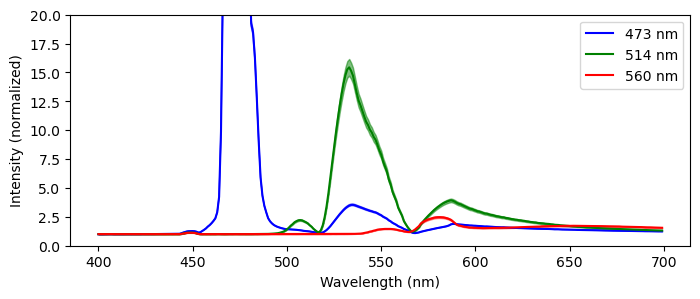

In [75]:
# Plot intensity over wavelength

def plot_intensity(L,color,label):
    mean = np.mean(L,axis=0)
    std = np.std(L,axis=0)
    plt.plot(wavelength,mean,color=color,label=label)
    plt.fill_between(wavelength,mean-std,mean+std,alpha=0.5,color=color,label='_nolegend_')
    
plt.figure(figsize=(8,3))
plot_intensity(L_473_F2/100,'blue','473 nm')
plot_intensity(L_514_F2/100,'green','514 nm')
plot_intensity(L_560_F2/100,'red','560 nm')
plt.ylim(0,20)
plt.xlabel('Wavelength (nm)')
plt.ylabel('Intensity (normalized)')
plt.legend()
#plt.xlim(430,450)
plt.show()

In [61]:
# Low pass filter the signal

from scipy import signal

def butter_lowpass(cutoff, fs, order=1):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = signal.butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

def butter_lowpass_filter(data, cutoff, fs, order=1):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = signal.filtfilt(b, a, data)
    return y

# Low pass filter the signal
fps = 24
pass_freq = 5
filt_473_F1 = butter_lowpass_filter(L_473_F1,pass_freq,fps)
filt_473_F2 = butter_lowpass_filter(L_473_F2,pass_freq,fps)
filt_514_F1 = butter_lowpass_filter(L_514_F1,pass_freq,fps)
filt_514_F2 = butter_lowpass_filter(L_514_F2,pass_freq,fps)
filt_560_F1 = butter_lowpass_filter(L_560_F1,pass_freq,fps)
filt_560_F2 = butter_lowpass_filter(L_560_F2,pass_freq,fps)


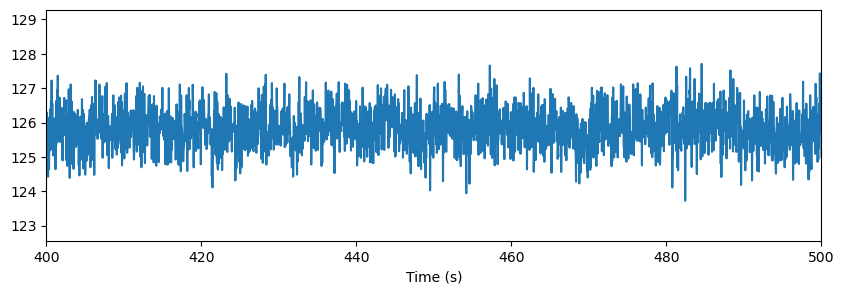

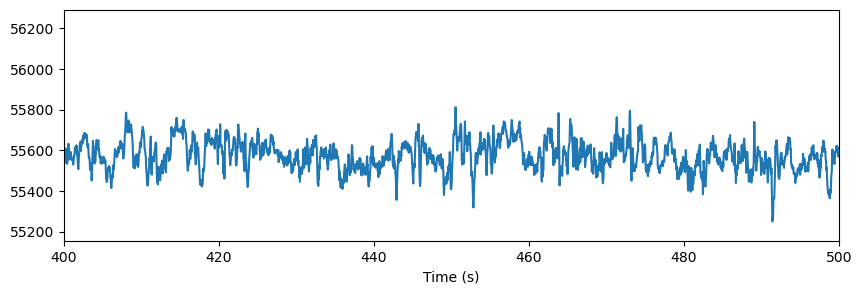

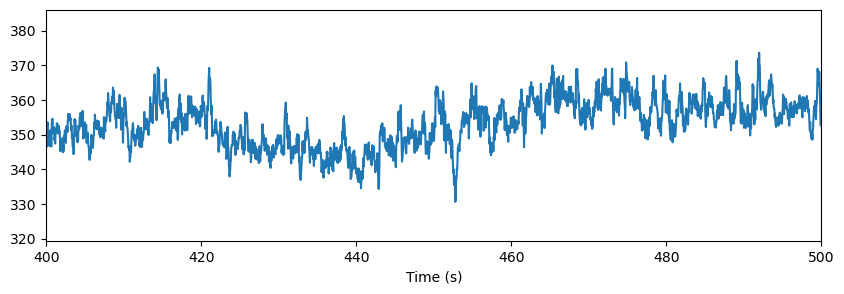

In [71]:
# Plot short segment time trace for each laser before laser noise removal

data = filt_473_F2
t = time_473 - time_473[0]

px1 = 450
px2 = 473
px3 = 535

xlim = [400,500]

plt.figure(figsize=(10,3))
plt.plot(t,data[:,px1-400])
plt.xlabel('Time (s)')
plt.xlim(xlim)
plt.show()

plt.figure(figsize=(10,3))
plt.plot(t,data[:,px2-400])
plt.xlabel('Time (s)')
plt.xlim(xlim)
plt.show()

plt.figure(figsize=(10,3))
plt.plot(t,data[:,px3-400])
plt.xlabel('Time (s)')
plt.xlim(xlim)
plt.show()

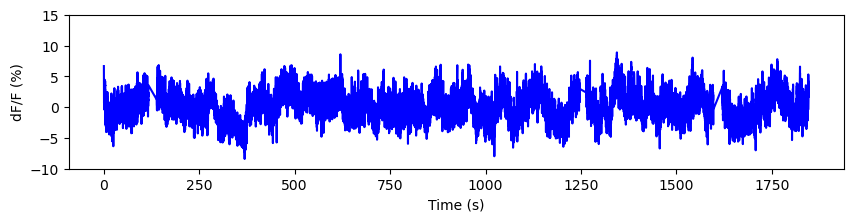

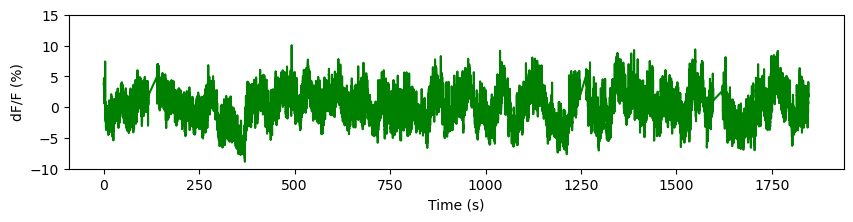

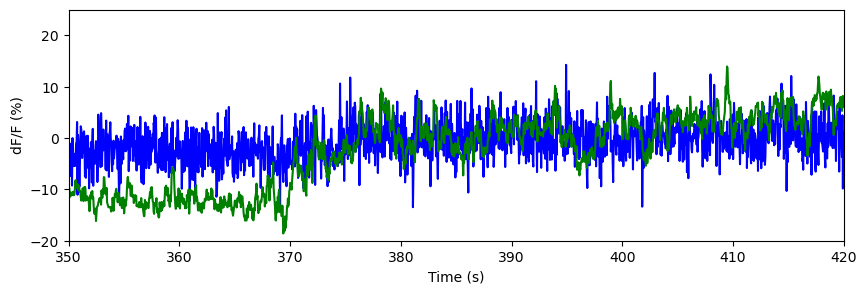

In [77]:
# Plot specific wavelength time trace for each excitation laser

# Detrent the signal with a 4th order polynomial
def detrend_signal(signal,time,color,ylim):
    x = np.arange(len(signal))
    p = np.polyfit(x,signal,4)
    y = np.polyval(p,x)
    signal_detrended = signal - y + np.mean(signal)
    dF_F = 100*(signal_detrended-np.mean(signal_detrended))/np.mean(signal_detrended)
    plt.figure(figsize=(10,2))
    plt.plot(time,dF_F,color=color)
    plt.xlabel('Time (s)')
    plt.ylabel('dF/F (%)')
    #plt.xlim([350,420])
    plt.ylim(ylim)
    plt.show()
    return 


px = 535
detrend_signal(L_473_F2[:,px-400],time_473-time_473[0],'blue',[-10,15])
px = 535
detrend_signal(L_514_F2[:,px-400],time_514-time_514[0],'green',[-10,15])


def detrend_signal(signal):
    x = np.arange(len(signal))
    p = np.polyfit(x,signal,4)
    y = np.polyval(p,x)
    signal_detrended = signal - y + np.mean(signal)
    dF_F = 100*(signal_detrended-np.mean(signal_detrended))/np.mean(signal_detrended)
    return dF_F

px = 510
dF_F_473 = detrend_signal(L_473_F2[:,px-400])
px = 540
dF_F_514 = detrend_signal(L_514_F2[:,px-400])
# Plot overlapping traces
plt.figure(figsize=(10,3))
plt.plot(time_473-time_473[0],5*dF_F_473,'b')
plt.plot(time_514-time_514[0],2*dF_F_514,'g')
plt.xlabel('Time (s)')
plt.ylabel('dF/F (%)')
plt.xlim([350,420])
plt.ylim([-20,25])
plt.show()

